Download data from https://www.kaggle.com/olistbr/brazilian-ecommerce

## Data schema
![](https://i.imgur.com/HRhd2Y0.png)

# Game plan
Starting from exploring `olist_orders_dataset` and `olist_order_items_dataset` which are centre of other datas.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
BASE_PATH = Path('../data')

In [2]:
order =  pd.read_csv(BASE_PATH/'olist_orders_dataset.csv')
order_item = pd.read_csv(BASE_PATH/'olist_order_items_dataset.csv')

In [3]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Simple exploration

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

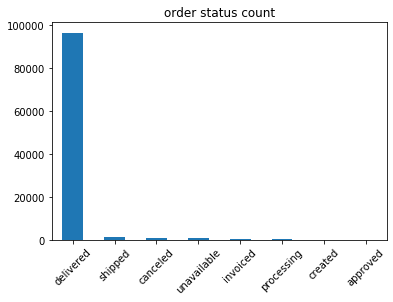

In [6]:
# order status count
_ = order['order_status'].value_counts().plot.bar()
_ = plt.title('order status count')
_ = plt.xticks(rotation=45)

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


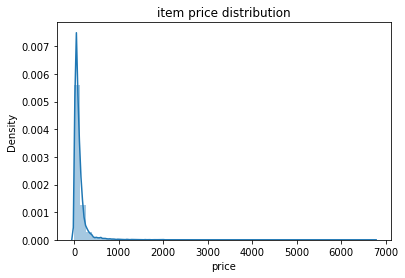

In [7]:
# price & freight distribution
_ = sns.distplot(order_item.price)
_ = plt.title('item price distribution')

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


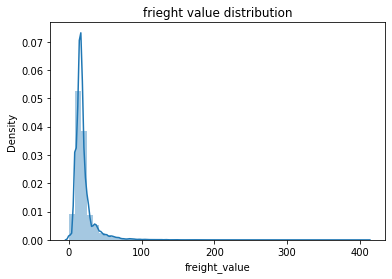

In [8]:
_ = sns.distplot(order_item.freight_value)
_ = plt.title('frieght value distribution')

## Things to find out from order data:
* Purchase/order through out time
* Order value distribution
* Basket size
* How many times do customers buy products?
* How many percent of orders were delivered before estimated delivery date?
* Best selling product categories
* Best selling sellers
* Frequently purchasing customers
* TBD

### Purchase/order through time

In [9]:
# orders through time

# -- preprocess datetime columns -> create new columns by parse to datetime and convert to date
dt_cols_orders = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']
dt_cols_order_items = ['shipping_limit_date']
for col in dt_cols_orders: order[col+'_as_date'] = order[col].apply(lambda x:pd.to_datetime(x).date())
for col in dt_cols_order_items: order_item[col+'_as_date'] = order_item[col].apply(lambda x:pd.to_datetime(x).date())

In [10]:
# -- group order by date
order_by_date = order.groupby(['order_purchase_timestamp_as_date'])['order_id'].count().reset_index()

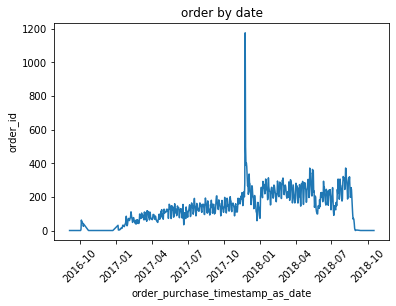

In [11]:
# -- plot order by date
_ = sns.lineplot(x='order_purchase_timestamp_as_date',y='order_id', data=order_by_date)
_ = plt.title('order by date')
_ = plt.xticks(rotation=45)

### Order value distribution

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


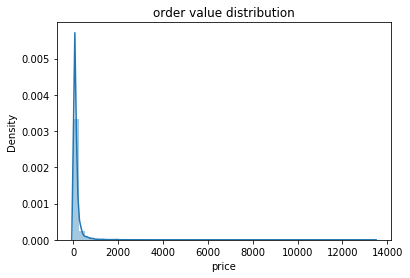

In [12]:
_ = sns.distplot(order_item.groupby(['order_id'])['price'].sum())
_ = plt.title('order value distribution')

In [13]:
order_item.groupby(['order_id'])['price'].sum().describe()

count    98666.000000
mean       137.754076
std        210.645145
min          0.850000
25%         45.900000
50%         86.900000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

### Basket size

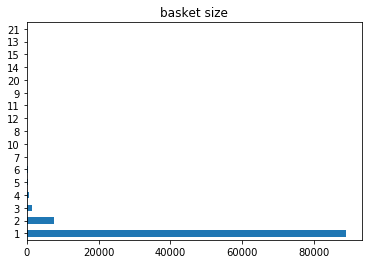

In [14]:
_ = order_item.groupby(['order_id'])['product_id'].count().value_counts().plot.barh()
_ = plt.title('basket size')

### How many times do customers buy products?

In [15]:
# import customer data
customer = pd.read_csv(BASE_PATH/'olist_customers_dataset.csv')

In [16]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
assert len(customer['customer_id']) == customer['customer_id'].nunique()

In [18]:
# number of unique customer id with more than one customer id (customer who buy more than one time)
print(f'number of customer id: {len(customer["customer_id"])}')
print(f'number of unique customer id: {customer["customer_unique_id"].nunique()}')
print(f'number of return customer: {sum(customer["customer_unique_id"].value_counts()>1)}')

number of customer id: 99441
number of unique customer id: 96096
number of return customer: 2997


In [19]:
print(order.shape)
order = order.merge(customer[['customer_id','customer_unique_id']], on='customer_id', how='inner')
print(order.shape)

(99441, 13)
(99441, 14)


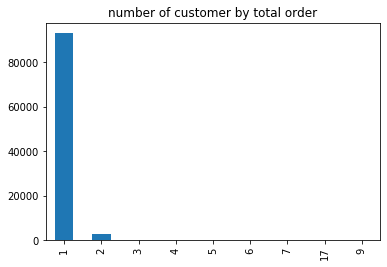

In [20]:
_ = order.groupby(['customer_unique_id'])['order_id'].count().value_counts().plot.bar()
_ = plt.title('number of customer by total order')

### How many percent of orders were delivered before estimated delivery date?

In [21]:
delivery_delay = order[~order['order_delivered_customer_date_as_date'].isna()].apply(lambda x:\
    x['order_delivered_customer_date_as_date'] - x['order_estimated_delivery_date_as_date'], axis=1)

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


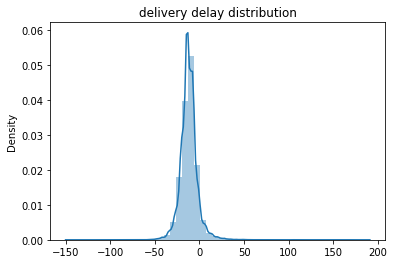

In [22]:

_ = sns.distplot(delivery_delay.dt.days.values)
_ = plt.title('delivery delay distribution')

In [23]:
delivery_delay.dt.days.describe()

count    96476.000000
mean       -11.876881
std         10.183854
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
dtype: float64

### Best selling product categories

In [24]:
# read product data
products = pd.read_csv(BASE_PATH/'olist_products_dataset.csv')

In [25]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
# product category name translation
cat_tran = pd.read_csv(BASE_PATH/'product_category_name_translation.csv')

In [27]:
cat_tran.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [28]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
products['product_category_name'] = products['product_category_name'].fillna('na')

In [30]:
print(products.shape)
products = products.merge(cat_tran, on='product_category_name', how='left')
print(products.shape)

(32951, 9)
(32951, 10)


In [31]:
products.isna().sum()

product_id                         0
product_category_name              0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [32]:
products['product_category_name_english'] = products['product_category_name_english'].fillna('na')

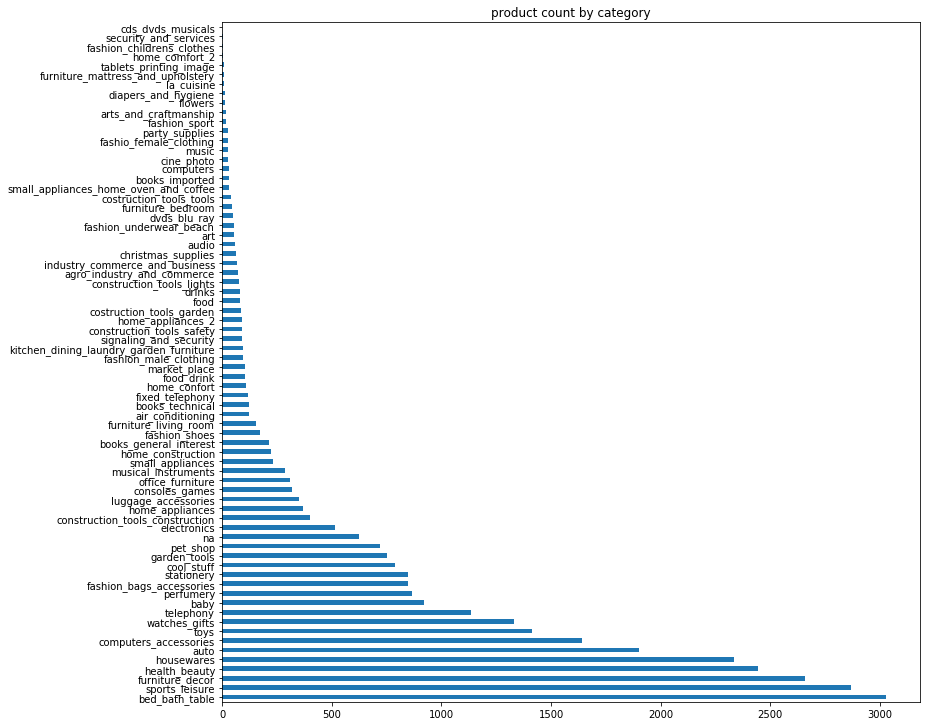

In [33]:
# check categories distribution from product meta data
_ = products['product_category_name_english'].value_counts().plot.barh(figsize=(12.5,12.5))
_ = plt.title('product count by category')

In [34]:
products['product_category_name_english'].nunique()

72

In [35]:
# merge product categories
print('shape before merge: ',order_item.shape)
order_item = order_item.merge(products[['product_id','product_category_name_english']],on='product_id')
print('shape after merge: ',order_item.shape)

shape before merge:  (112650, 8)
shape after merge:  (112650, 9)


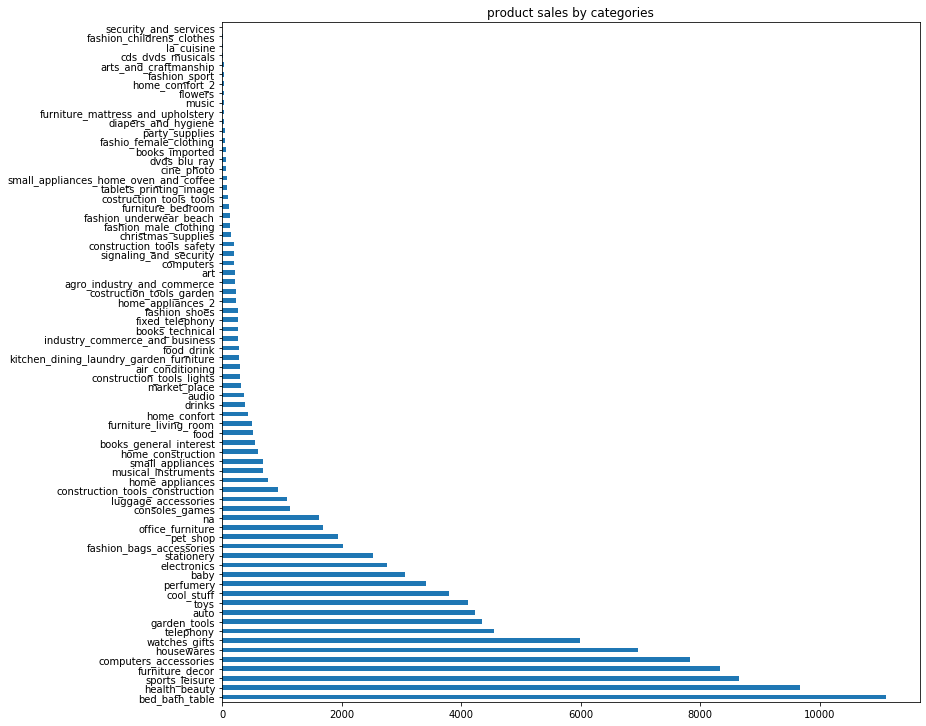

In [36]:
_ = order_item['product_category_name_english'].value_counts().plot.barh(figsize=(12.5,12.5))
_ = plt.title('product sales by categories')

In [37]:
# relation between number of products in categories and sales in categories
cat_n_x_sales = products['product_category_name_english'].value_counts().reset_index().merge(
order_item['product_category_name_english'].value_counts().reset_index(), on='index')
cat_n_x_sales.columns = ['category', 'number of products in category', 'number of orders']

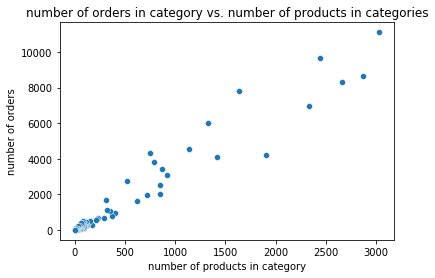

In [38]:
_ = sns.scatterplot(x='number of products in category', y='number of orders', data=cat_n_x_sales)
_ = plt.title('number of orders in category vs. number of products in categories')

### Best selling sellers

In [39]:
# read sellers data
sellers = pd.read_csv(BASE_PATH/'olist_sellers_dataset.csv')

In [40]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


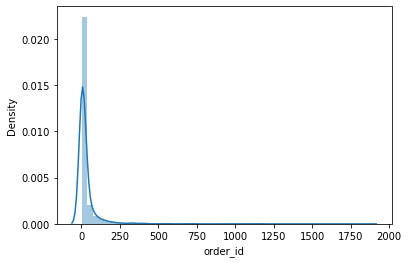

In [41]:
# just ignore sellers data at the moment
_ = sns.distplot(order_item.groupby(['seller_id'])['order_id'].nunique())

In [42]:
order_item.groupby(['seller_id'])['order_id'].nunique().describe()

count    3095.000000
mean       32.313409
std       105.139763
min         1.000000
25%         2.000000
50%         6.000000
75%        21.500000
max      1854.000000
Name: order_id, dtype: float64

In [43]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_as_date,order_approved_at_as_date,order_delivered_carrier_date_as_date,order_delivered_customer_date_as_date,order_estimated_delivery_date_as_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6


### Product reiew

In [44]:
review = pd.read_csv(BASE_PATH/'olist_order_reviews_dataset.csv')

In [45]:
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [46]:
assert review['order_id'].nunique() == len(review)

AssertionError: 

In [47]:
 review['order_id'].nunique(), len(review)

(99441, 100000)

In [48]:
# look at order with more than one review
review[review.groupby('order_id')['review_id'].transform(len)>1].sort_values(['order_id','review_id'])

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
22585,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
25802,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
69191,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
22946,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
857,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:06
...,...,...,...,...,...,...,...
95246,c56a88a404315a0d9e412c1472dda2c4,ff763b73e473d03c321bcd5a053316e8,5,NaN,NaN,2017-11-01 00:00:00,2017-11-01 19:55:52
41665,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55
18916,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anu...",2017-08-22 00:00:00,2017-08-25 11:40:22
54388,5476dd0eaee7c4e2725cafb011aa758c,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-21 13:24:55


In [49]:
# checking data shape
review.shape

(100000, 7)

In [50]:
# checking null
review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [51]:
# total non null review
print(f'total non null review: {len(review[~review["review_comment_message"].isna()])}')

total non null review: 41753


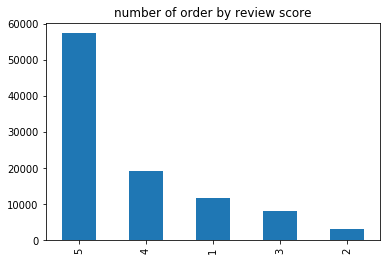

In [52]:
_ = review['review_score'].value_counts().plot.bar()
_ = plt.title('number of order by review score')

In [53]:
# check review score within each product category

# --group review by order_id
order_rating = review.groupby('order_id')['review_score'].mean().reset_index()

In [54]:
order_rating.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [55]:
# --group category by order
order_cat = order_item.groupby('order_id')['product_category_name_english'].max().reset_index()

In [56]:
order_cat.head()

,order_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools


In [57]:
# --merge
order_ = order.merge(order_rating,on='order_id').merge(order_cat, on='order_id')

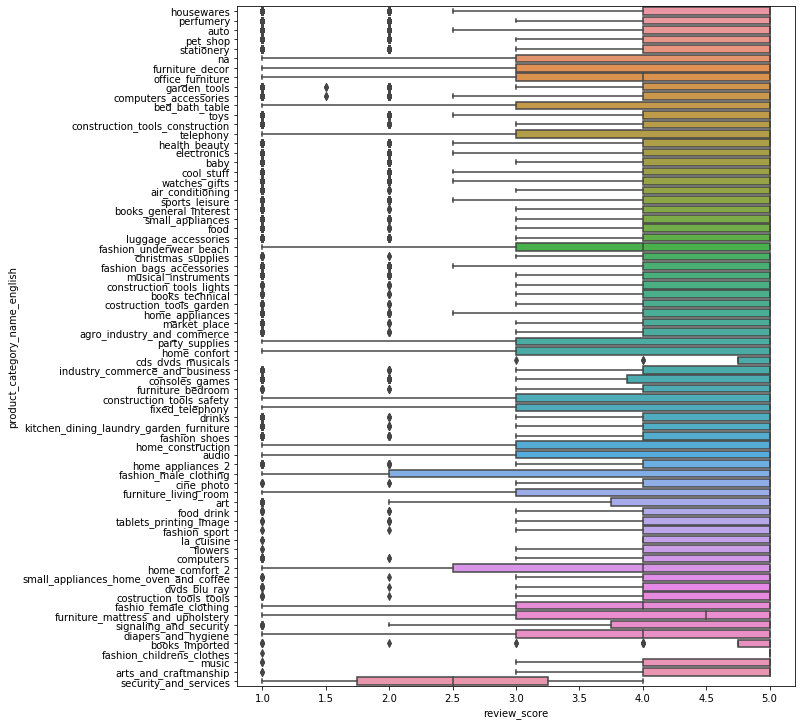

In [58]:
f, ax = plt.subplots(figsize=(10, 12.5))
_ = sns.boxplot(y='product_category_name_english',x='review_score',data=order_)